In [1]:
# imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# google trends
def merge_and_normalize_trends(dfs, col_name):
    # Start with the first DataFrame
    result = dfs[0].copy()
    for next_df in dfs[1:]:
        # Find overlap
        overlap = set(result["Woche"]) & set(next_df["Woche"])
        if overlap:
            # Use the mean ratio in the overlap to normalize
            overlap = list(overlap)
            result_overlap = result[result["Woche"].isin(overlap)].set_index("Woche")
            next_overlap = next_df[next_df["Woche"].isin(overlap)].set_index("Woche")
            ratio = result_overlap[col_name].mean() / next_overlap[col_name].mean()
        else:
            ratio = 1.0
        # Normalize next_df
        next_df_norm = next_df.copy()
        next_df_norm[col_name] = next_df_norm[col_name] * ratio
        # Append only non-overlapping part
        non_overlap = ~next_df_norm["Woche"].isin(result["Woche"])
        result = pd.concat([result, next_df_norm[non_overlap]], ignore_index=True)
    # Sort by date
    result = result.sort_values("Woche").reset_index(drop=True)
    return result


# Keyword: "Auto Finanzierung"
gt_auto_finanzierung_1 = pd.read_csv("./original_data/gt_auto_finanzierung_1.csv")
gt_auto_finanzierung_2 = pd.read_csv("./original_data/gt_auto_finanzierung_2.csv")
gt_auto_finanzierung_3 = pd.read_csv("./original_data/gt_auto_finanzierung_3.csv")

gt_auto_finanzierung = merge_and_normalize_trends(
    [gt_auto_finanzierung_1, gt_auto_finanzierung_2, gt_auto_finanzierung_3],
    col_name="Auto Finanzierung",
)
gt_auto_finanzierung.rename(columns={"Woche": "DATE"}, inplace=True)
gt_auto_finanzierung['DATE'] = pd.to_datetime(gt_auto_finanzierung['DATE'])
# Keyword: "BMW Finanzierung"
gt_bmw_finanzierung_1 = pd.read_csv("./original_data/gt_bmw_finanzierung_1.csv")
gt_bmw_finanzierung_2 = pd.read_csv("./original_data/gt_bmw_finanzierung_2.csv")
gt_bmw_finanzierung_3 = pd.read_csv("./original_data/gt_bmw_finanzierung_3.csv")

gt_bmw_finanzierung = merge_and_normalize_trends(
    [gt_bmw_finanzierung_1, gt_bmw_finanzierung_2, gt_bmw_finanzierung_3],
    col_name="BMW Finanzierung",
)
gt_bmw_finanzierung.rename(columns={"Woche": "DATE"}, inplace=True)
gt_bmw_finanzierung['DATE'] = pd.to_datetime(gt_bmw_finanzierung['DATE'])
# Keyword: "Auto Leasing"
gt_auto_leasing_1 = pd.read_csv("./original_data/gt_auto_leasing_1.csv")
gt_auto_leasing_2 = pd.read_csv("./original_data/gt_auto_leasing_2.csv")
gt_auto_leasing_3 = pd.read_csv("./original_data/gt_auto_leasing_3.csv")

gt_auto_leasing = merge_and_normalize_trends(
    [gt_auto_leasing_1, gt_auto_leasing_2, gt_auto_leasing_3], col_name="Auto Leasing"
)
gt_auto_leasing.rename(columns={"Woche": "DATE"}, inplace=True)
gt_auto_leasing['DATE'] = pd.to_datetime(gt_auto_leasing['DATE'])
# Keyword: "BMW Leasing"
gt_bmw_leasing_1 = pd.read_csv("./original_data/gt_bmw_leasing_1.csv")
gt_bmw_leasing_2 = pd.read_csv("./original_data/gt_bmw_leasing_2.csv")
gt_bmw_leasing_3 = pd.read_csv("./original_data/gt_bmw_leasing_3.csv")
gt_bmw_leasing = merge_and_normalize_trends(
    [gt_bmw_leasing_1, gt_bmw_leasing_2, gt_bmw_leasing_3], col_name="BMW Leasing"
)
gt_bmw_leasing.rename(columns={"Woche": "DATE"}, inplace=True)
gt_bmw_leasing['DATE'] = pd.to_datetime(gt_bmw_leasing['DATE'])
# Keyword: "Leasing"
gt_leasing_1 = pd.read_csv("./original_data/gt_leasing_1.csv")
gt_leasing_2 = pd.read_csv("./original_data/gt_leasing_2.csv")
gt_leasing_3 = pd.read_csv("./original_data/gt_leasing_3.csv")
gt_leasing = merge_and_normalize_trends(
    [gt_leasing_1, gt_leasing_2, gt_leasing_3], col_name="leasing"
)
gt_leasing.rename(columns={"Woche": "DATE"}, inplace=True)
gt_leasing['DATE'] = pd.to_datetime(gt_leasing['DATE'])
# Keyword: "BMW"
gt_bmw_1 = pd.read_csv("./original_data/gt_bmw_1.csv")
gt_bmw_2 = pd.read_csv("./original_data/gt_bmw_2.csv")
gt_bmw_3 = pd.read_csv("./original_data/gt_bmw_3.csv")
gt_bmw = merge_and_normalize_trends([gt_bmw_1, gt_bmw_2, gt_bmw_3], col_name="BMW")
gt_bmw.rename(columns={"Woche": "DATE"}, inplace=True)
gt_bmw['DATE'] = pd.to_datetime(gt_bmw['DATE'])


# Log transform
gt_bmw_leasing_log = pd.DataFrame({
    "DATE": gt_bmw_leasing["DATE"],
    "BMWLeasing": np.log(gt_bmw_leasing["BMW Leasing"].replace(0, np.nan))
})
gt_bmw_finanzierung_log = pd.DataFrame({
    "DATE": gt_bmw_finanzierung["DATE"],
    "BMWFinanzierung": np.log(gt_bmw_finanzierung["BMW Finanzierung"].replace(0, np.nan))
})
gt_auto_finanzierung_log = pd.DataFrame({
    "DATE": gt_auto_finanzierung["DATE"],
    "AutoFinanzierung": np.log(gt_auto_finanzierung["Auto Finanzierung"].replace(0, np.nan))
})
gt_auto_leasing_log = pd.DataFrame({
    "DATE": gt_auto_leasing["DATE"],
    "AutoLeasing": np.log(gt_auto_leasing["Auto Leasing"].replace(0, np.nan))
})
gt_leasing_log = pd.DataFrame({
    "DATE": gt_leasing["DATE"],
    "leasing": np.log(gt_leasing["leasing"].replace(0, np.nan))
})
gt_bmw_log = pd.DataFrame({
    "DATE": gt_bmw["DATE"],
    "BMW": np.log(gt_bmw["BMW"].replace(0, np.nan))
})

In [3]:
# agpi
agpi = pd.read_csv("./original_data/agpi.csv")

agpi["DATE"] = pd.to_datetime(agpi["DATE"], format="%Y-%m") + pd.offsets.MonthEnd(0)
# agpi["DATE"] = agpi["DATE"].dt.strftime("%Y-%m-%d") # Keep as datetime

agpi_log = pd.DataFrame({
    "DATE": agpi["DATE"],
    "AGPI": np.log(agpi["AGPI"].replace(0, np.nan))
})


agpi_log

,DATE,AGPI
0,2019-01-31,9.926325
1,2019-02-28,9.936245
2,2019-03-31,9.935374
3,2019-04-30,9.934017
4,2019-05-31,9.921868
...,...,...
65,2024-06-30,10.190770
66,2024-07-31,10.189643
67,2024-08-31,10.195859
68,2024-09-30,10.184145


In [4]:
# gebrauchtwagenpreiseindex

gebrauchtwagenpreisindex = pd.read_csv("./original_data/gebrauchtwagenpreisindex.csv")
gebrauchtwagenpreisindex["DATE"] = pd.to_datetime(
    gebrauchtwagenpreisindex["DATE"], errors="coerce"
) + pd.offsets.MonthEnd(0)
# gebrauchtwagenpreisindex["DATE"] = gebrauchtwagenpreisindex["DATE"].dt.strftime( # Keep as datetime
#     "%Y-%m-%d"
# )

gebrauchtwagenpreisindex_log = pd.DataFrame({
    "DATE": gebrauchtwagenpreisindex["DATE"],
    "Gebrauchtwagenpreisindex": np.log(
        gebrauchtwagenpreisindex["Gebrauchtwagenpreisindex"].replace(0, np.nan)
    )
})

In [5]:
# arbeitslosenzahlen

month_map = {
    "Januar": "01",
    "Februar": "02",
    "März": "03",
    "April": "04",
    "Mai": "05",
    "Juni": "06",
    "Juli": "07",
    "August": "08",
    "September": "09",
    "Oktober": "10",
    "November": "11",
    "Dezember": "12",
}
arbeitslosenquote = pd.read_csv(
    "./original_data/arbeitslosenzahlen.csv", sep=";", decimal=","
)

# Clean integer columns (remove dots, convert to int)
for col in ["Bestand Arbeitslose", "Zugang Arbeitslose", "Abgang Arbeitslose"]:
    arbeitslosenquote[col] = (
        arbeitslosenquote[col]
        .astype(str)
        .str.replace(".", "", regex=False)
        .replace("", "0")
        .astype(int)
    )

# Clean float column (replace comma with dot, convert to float)
arbeitslosenquote["Arbeitslosenquote"] = (
    arbeitslosenquote["Arbeitslosenquote"]
    .astype(str)
    .str.replace(",", ".", regex=False)
    .replace("", "0")
    .astype(float)
)

# Convert 'Berichtsmonat' to datetime
arbeitslosenquote["DATE"] = (
    arbeitslosenquote["Berichtsmonat"]
    .astype(str)
    .apply(
        lambda x: pd.to_datetime(
            f"{x.split(' ')[1]}-{month_map.get(x.split(' ')[0], '01')}-01",
            errors="coerce",
        )
    )
)
arbeitslosenquote["DATE"] = arbeitslosenquote["DATE"] + pd.offsets.MonthEnd(0)

# Reorder columns
arbeitslosenquote = arbeitslosenquote.drop(columns=["Berichtsmonat"])
arbeitslosenquote = arbeitslosenquote[
    ["DATE"] + [col for col in arbeitslosenquote.columns if col != "DATE"]
]



In [6]:
# euribor
# 3 months
euribor_3m = pd.read_csv("./original_data/euribor_3m.csv")
euribor_3m = euribor_3m.drop(columns=["TIME PERIOD"])
euribor_3m = euribor_3m.rename(
    columns={
        "Euribor 3-month - Historical close, average of observations through period (FM.M.U2.EUR.RT.MM.EURIBOR3MD_.HSTA)": "Euribor 3M"
    }
)
# 6 months
euribor_6m = pd.read_csv("./original_data/euribor_6m.csv")
euribor_6m = euribor_6m.drop(columns=["TIME PERIOD"])
euribor_6m = euribor_6m.rename(
    columns={
        "Euribor 6-month - Historical close, average of observations through period (FM.M.U2.EUR.RT.MM.EURIBOR6MD_.HSTA)": "Euribor 6M"
    }
)
# 12 months
euribor_12m = pd.read_csv("./original_data/euribor_12m.csv")
euribor_12m = euribor_12m.drop(columns=["TIME PERIOD"])
euribor_12m = euribor_12m.rename(
    columns={
        "Euribor 1-year - Historical close, average of observations through period (FM.M.U2.EUR.RT.MM.EURIBOR1YD_.HSTA)": "Euribor 12M"
    }
)


In [7]:
# ifo beschäftigungsbarometer
beschaeftigungsbarometer = pd.read_csv(
    "./original_data/ifo_beschaeftigungsbarometer.csv"
)
beschaeftigungsbarometer["DATE"] = pd.to_datetime(
    beschaeftigungsbarometer["DATE"], errors="coerce"
) + pd.offsets.MonthEnd(0)
beschaeftigungsbarometer["DATE"] = beschaeftigungsbarometer["DATE"].dt.strftime(
    "%Y-%m-%d"
)

In [8]:
# ifo geschäftsklima
geschaeftsklima = pd.read_csv("./original_data/ifo_geschaeftsklima.csv")
geschaeftsklima["DATE"] = pd.to_datetime(
    geschaeftsklima["DATE"].str.strip(), format="%m/%Y"
) + pd.offsets.MonthEnd(0)
geschaeftsklima["DATE"] = geschaeftsklima["DATE"].dt.strftime("%Y-%m-%d")

In [9]:
# bmw sales
bmw_sales = pd.read_csv("./original_data/bmw_sales.csv", sep=";", decimal=",")
bmw_sales['DATE'] = pd.to_datetime(bmw_sales['DATE']) # Ensure DATE is datetime

bmw_sales_log = pd.DataFrame(
    {
        "DATE": bmw_sales["DATE"],
        "SALES": np.log(bmw_sales["SALES"].replace(0, np.nan)),
    }
)

In [10]:
# verbraucherpreisindex
verbraucherpreisindex = pd.read_csv(
    "./original_data/verbraucherpreisindex.csv", sep=";", decimal=","
)

# Columns to clean: replace comma with period and convert to float
cols_to_clean_comma = [
    "Index der Erzeugerpreise gewerblicher Produkte",
    "Index der Einfuhrpreise",
    "Index der Ausfuhrpreise",
]

for col in cols_to_clean_comma:
    verbraucherpreisindex[col] = (
        verbraucherpreisindex[col]
        .astype(str)
        .str.replace(",", ".", regex=False)
        .replace(
            ".", "0", regex=False
        )  # Handle cases where only a period might be left or as a placeholder
        .replace("", "0")  # Replace empty strings with 0
        .astype(float)
    )

# Convert "Datum" to datetime, then set to last day of month
verbraucherpreisindex["DATE"] = pd.to_datetime(
    verbraucherpreisindex["Datum"], format="%d/%m/%Y"
) + pd.offsets.MonthEnd(0)
# verbraucherpreisindex["DATE"] = verbraucherpreisindex["DATE"].dt.strftime("%Y-%m-%d") # Keep as datetime
verbraucherpreisindex = verbraucherpreisindex.drop(columns=["Datum"])
cols = ["DATE"] + [col for col in verbraucherpreisindex.columns if col != "DATE"]
verbraucherpreisindex = verbraucherpreisindex[cols]

# Log-transform selected columns (except DATE)
cols_to_log = [
    "Verbraucherpreisindex",
    "Index der Einzelhandelspreise",
    "Index der Erzeugerpreise gewerblicher Produkte",
    "Index der Growsshandelsverkaufspreise",
    "Index der Einfuhrpreise",
    "Index der Ausfuhrpreise",
]

verbraucherpreisindex_log = verbraucherpreisindex[["DATE"] + cols_to_log].copy()
for col in cols_to_log:
    verbraucherpreisindex_log[col] = np.log(verbraucherpreisindex_log[col].replace(0, np.nan))

In [11]:
# Merge all dataframes on DATE
from functools import reduce

# dataframes = [
#     bmw_sales,
#     gt_auto_finanzierung,
#     gt_bmw_finanzierung,
#     gt_auto_leasing,
#     gt_bmw_leasing,
#     gt_leasing,
#     gt_bmw,
#     agpi,
#     gebrauchtwagenpreisindex,
#     euribor_3m,
#     euribor_6m,
#     euribor_12m,
#     verbraucherpreisindex,
#     arbeitslosenquote,
#     beschaeftigungsbarometer,
#     geschaeftsklima,
# ]

dataframes = [
    bmw_sales_log,
    gt_auto_finanzierung_log,
    gt_bmw_finanzierung_log,
    gt_auto_leasing_log,
    gt_bmw_leasing_log,
    gt_leasing_log,
    gt_bmw_log,
    agpi_log,
    gebrauchtwagenpreisindex_log,
    euribor_3m,
    euribor_6m,
    euribor_12m,
    verbraucherpreisindex_log,
    arbeitslosenquote,
    beschaeftigungsbarometer,
    geschaeftsklima,
]

# Ensure all DATE columns are in datetime format
for df_item in dataframes:
    if "DATE" in df_item.columns:
        df_item["DATE"] = pd.to_datetime(df_item["DATE"])

merged = reduce(
    lambda left, right: pd.merge(left, right, on="DATE", how="outer"), dataframes
)
merged.columns = merged.columns.str.replace(r"\s+", "", regex=True)
merged.to_csv("data.csv", index=False)

In [12]:
merged.describe()

,DATE,SALES,AutoFinanzierung,BMWFinanzierung,AutoLeasing,BMWLeasing,leasing,BMW,AGPI,Gebrauchtwagenpreisindex,...,Arbeitslosenquote,Beschäftigungsbarometer,VerarbeitendesGewerbe,Bauhauptgewerbe,Handel,Dienstleistungssektor,Geschäftsklima,Geschäftslage,Geschäftserwartungen,Konjunkturampel
count,902,542.000000,543.000000,542.000000,543.000000,543.000000,543.000000,543.000000,70.000000,124.000000,...,216.000000,280.000000,280.000000,280.000000,280.000000,280.000000,244.000000,244.000000,244.000000,244.000000
mean,2015-10-25 04:40:58.536585216,8.325527,4.326917,3.915867,4.578721,4.373930,4.447734,4.321951,10.091991,4.831985,...,6.429630,97.577857,-5.296786,-6.657143,-4.851071,6.669286,95.685246,95.872541,95.607787,57.623361
min,1994-01-31 00:00:00,7.121252,3.583519,2.955798,3.761200,3.818107,3.713572,3.962044,9.892275,4.605170,...,4.800000,86.800000,-40.000000,-46.200000,-34.700000,-18.300000,75.000000,77.500000,71.000000,0.000000
25%,2012-11-07 12:00:00,8.185768,4.219508,3.714663,4.317488,4.248495,4.234107,4.230308,9.944569,4.701162,...,5.700000,93.575000,-15.325000,-11.025000,-11.800000,0.600000,91.175000,90.850000,92.500000,22.300000
50%,2018-03-02 00:00:00,8.328209,4.330733,3.937685,4.620164,4.371875,4.501427,4.317488,10.130366,4.775335,...,6.300000,98.600000,-3.700000,-2.750000,-1.950000,8.200000,97.900000,97.900000,97.850000,70.800000
75%,2021-10-08 06:00:00,8.476266,4.442651,4.124562,4.861074,4.496866,4.665396,4.392827,10.212561,4.938939,...,7.100000,100.600000,3.450000,2.400000,2.700000,12.300000,100.125000,100.500000,100.525000,92.350000
max,2025-05-18 00:00:00,8.920656,4.758516,4.605170,5.802430,4.867930,5.117613,6.002265,10.286468,5.145166,...,9.100000,105.000000,20.400000,18.400000,10.100000,22.600000,105.000000,108.500000,106.100000,100.000000
std,NaN,0.216636,0.184259,0.285749,0.355380,0.167837,0.267806,0.173448,0.137958,0.144366,...,1.041623,4.394736,12.519835,15.155326,9.939559,7.778201,6.108702,7.074345,6.624954,35.883843


In [13]:
# Data transformation

# Ensure 'DATE' column is datetime
merged['DATE'] = pd.to_datetime(merged['DATE'])
merged = merged.sort_values("DATE").reset_index(drop=True)

# Interpolate on the original merged data
interpolated_on_original_timeline = (
    merged.set_index("DATE")
    .interpolate(method="time", limit_direction="both")
    .reset_index()
)

# Weekly (Sunday) index
all_sundays_index = pd.date_range(
    start=merged["DATE"].min(), 
    end=merged["DATE"].max(),   
    freq="W-SUN",               
    name="DATE"                 
)

# Align the broadly interpolated data to the target weekly (Sunday) index
interpolated_on_original_timeline = interpolated_on_original_timeline.set_index("DATE")

# Reindex to the all_sundays_index
data_aligned_to_sundays = interpolated_on_original_timeline.reindex(all_sundays_index)

# Interpolate again to fill any NaNs created by reindexing to Sundays
interpolated = (
    data_aligned_to_sundays.interpolate(method="time", limit_direction="both")
    .reset_index()
)

final_start_date = pd.Timestamp("2015-01-01")
interpolated = interpolated[
    interpolated["DATE"] >= final_start_date
].reset_index(drop=True)


In [14]:
# Removing outliers

In [15]:
# seasonal adjustment
from statsmodels.tsa.seasonal import STL

# List of columns to be seasonally adjusted
seasonal_cols = [
    "SALES",
    "AutoFinanzierung",
    "BMWFinanzierung",
    "AutoLeasing",
    "BMWLeasing",
    "leasing",
    "BMW",
    "AGPI",
    "Gebrauchtwagenpreisindex",
    "Euribor3M",
    "Euribor6M",
    "Euribor12M",
    "BestandArbeitslose",
    "ZugangArbeitslose",
    "AbgangArbeitslose",
    "Arbeitslosenquote",
    "Beschäftigungsbarometer",
    "VerarbeitendesGewerbe",
    "Bauhauptgewerbe",
    "Handel",
    "Dienstleistungssektor",
    "Geschäftsklima",
    "Geschäftslage",
    "Geschäftserwartungen",
    "Konjunkturampel",
]

df_sa = interpolated.copy()
df_sa = df_sa.set_index("DATE")

for col in seasonal_cols:
    if col in df_sa.columns:
        series = df_sa[col].dropna()  # Remove NaNs
        if len(series) > 2 * 52:  # Check if enough data points (period=12)
            stl = STL(series, period=52, robust=True)
            res = stl.fit()
            # Place the seasonally adjusted data back, aligning with the original index
            df_sa[col] = pd.Series(res.trend + res.resid, index=series.index)
        else:
            print(
                f"Column '{col}' has insufficient data points ({len(series)}) for STL decomposition after dropping NaNs. Skipping."
            )
            # Optionally, fill with NaNs or keep original if not enough data
            df_sa[col] = np.nan
    else:
        print(f"Warning: Column '{col}' not found in DataFrame df_sa.")

df_sa = df_sa.reset_index()

df_sa

,DATE,SALES,AutoFinanzierung,BMWFinanzierung,AutoLeasing,BMWLeasing,leasing,BMW,AGPI,Gebrauchtwagenpreisindex,...,Arbeitslosenquote,Beschäftigungsbarometer,VerarbeitendesGewerbe,Bauhauptgewerbe,Handel,Dienstleistungssektor,Geschäftsklima,Geschäftslage,Geschäftserwartungen,Konjunkturampel
0,2015-01-04,8.356709,4.212404,4.116698,3.963862,4.228324,4.051708,4.385080,9.926275,4.597721,...,6.554012,98.949770,-0.163360,-4.057025,-3.053914,9.410794,99.573727,99.285972,99.289968,102.063791
1,2015-01-11,8.374489,4.143415,4.171876,3.965001,4.241649,4.022319,4.401615,9.926252,4.600077,...,6.542818,98.966465,-0.109153,-3.535366,-2.646372,9.606400,99.547258,99.385408,99.156397,106.041030
2,2015-01-18,8.356642,4.177977,4.188887,3.960389,4.239411,4.018344,4.393417,9.926188,4.602478,...,6.533855,98.997258,-0.092810,-2.999386,-2.310155,9.762542,99.591028,99.486890,99.171154,109.949560
3,2015-01-25,8.498377,4.174190,4.152633,3.936735,4.249583,4.020446,4.415675,9.926341,4.604714,...,6.525833,99.028490,-0.085355,-2.463101,-1.995653,9.906230,99.664307,99.588448,99.257378,113.675239
4,2015-02-01,8.437407,4.231154,4.287790,4.020996,4.262064,4.035939,4.404067,9.926319,4.609521,...,6.512489,99.068215,-0.060900,-1.984305,-1.717145,10.061135,99.743358,99.675407,99.380794,116.673241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537,2025-04-20,8.142986,4.557728,4.034957,4.883347,4.447368,4.702269,4.372736,10.186662,4.911558,...,6.258399,92.748607,-20.048028,-1.669786,-17.581842,-1.689361,85.887552,84.803938,87.233299,22.777125
538,2025-04-27,8.224239,4.643359,4.146597,4.961590,4.445373,4.732340,4.354957,10.186194,4.911835,...,6.253216,92.835148,-19.531234,-1.992965,-17.749552,-1.588026,85.755249,84.736733,87.254181,21.362417
539,2025-05-04,8.229424,4.614803,3.956853,5.000267,4.474018,4.751446,4.381272,10.185725,4.911108,...,6.271390,92.883854,-19.533209,-1.986322,-18.150176,-1.451949,85.545891,84.757455,87.275076,20.948192
540,2025-05-11,8.224585,4.634612,3.785650,4.987860,4.458295,4.782894,4.379812,10.185256,4.910270,...,6.284190,92.913255,-19.773085,-1.766946,-18.220088,-2.778566,85.527259,84.791502,87.295985,23.431740


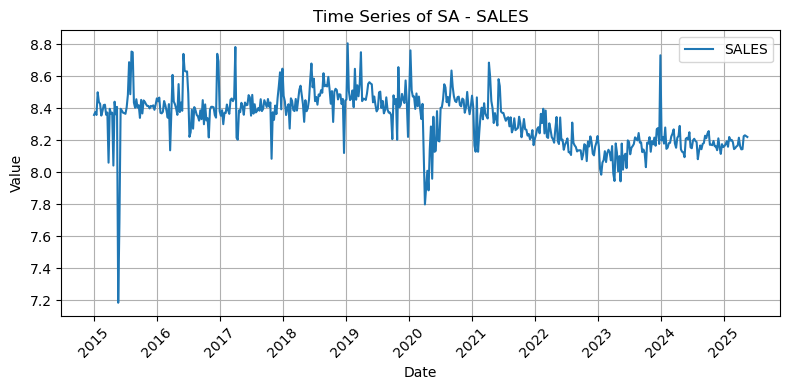

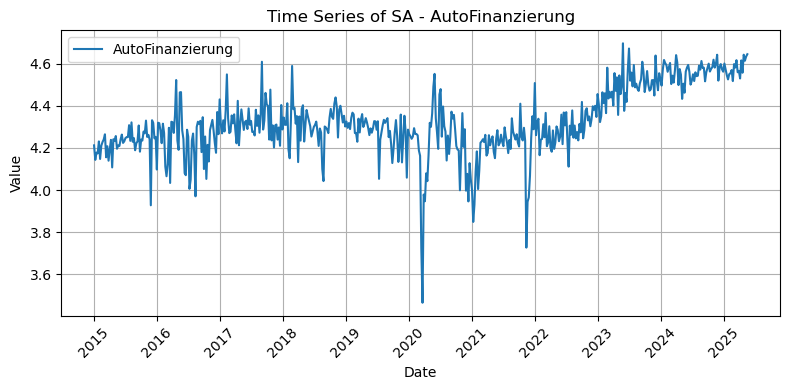

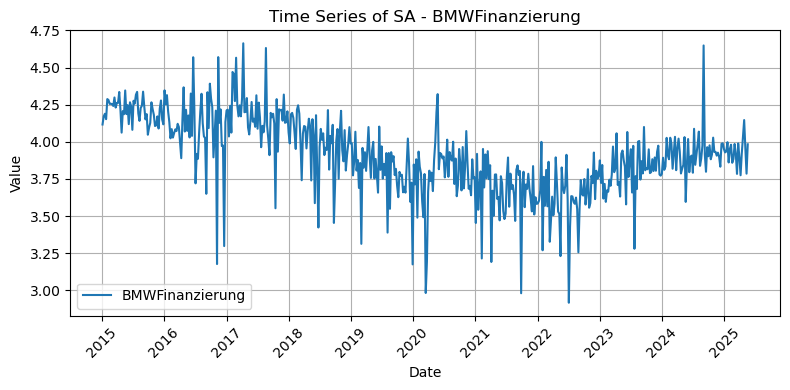

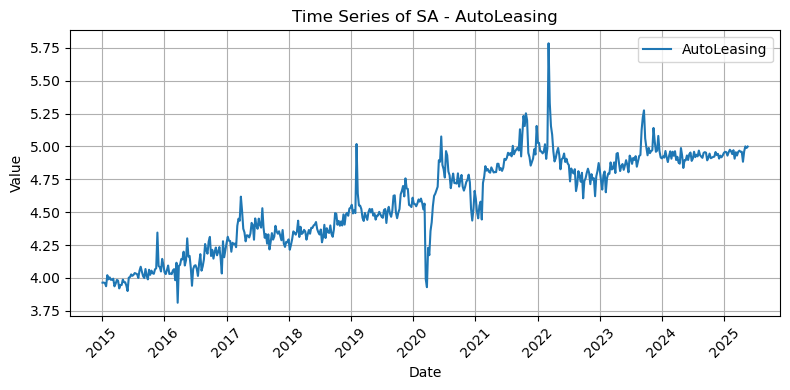

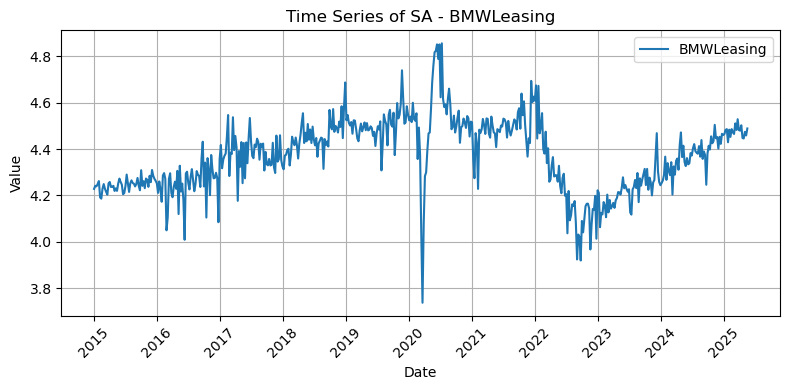

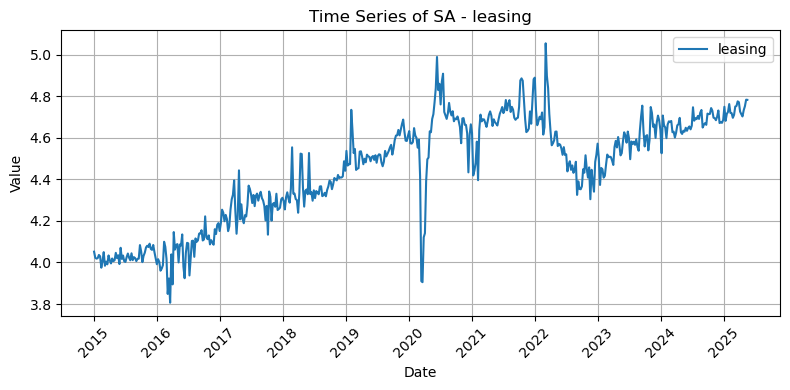

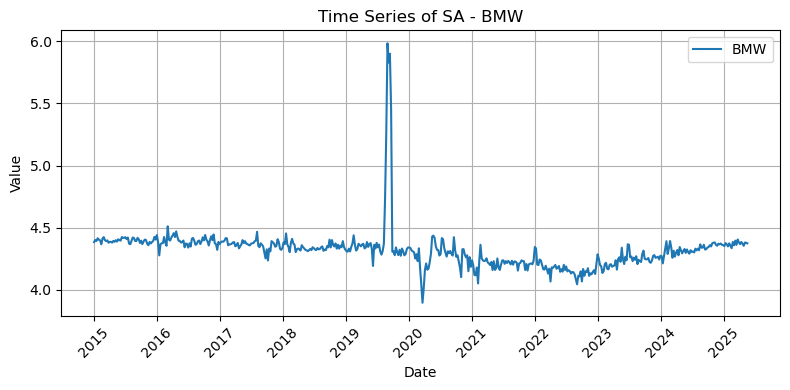

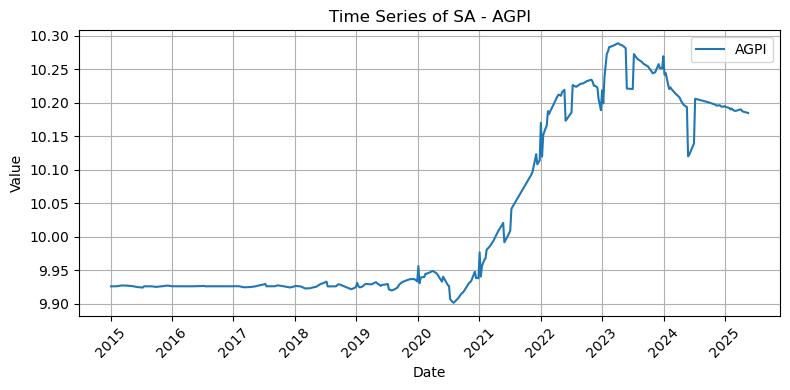

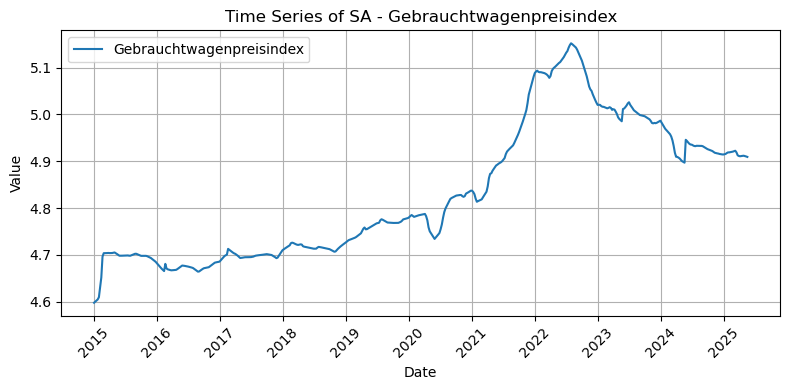

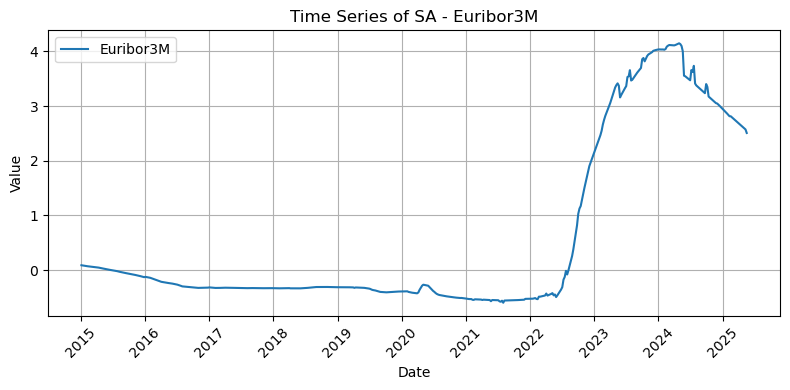

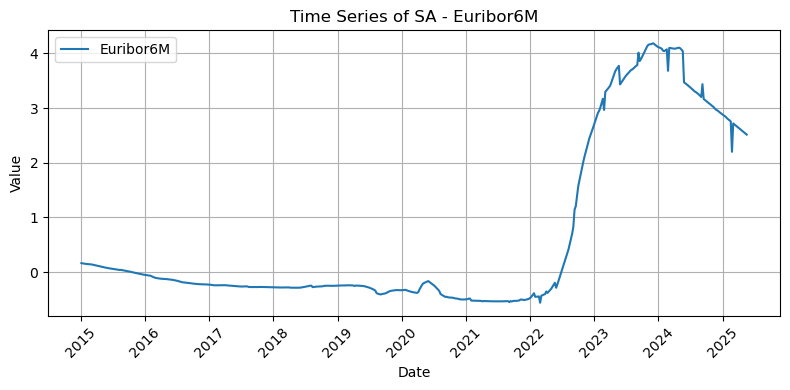

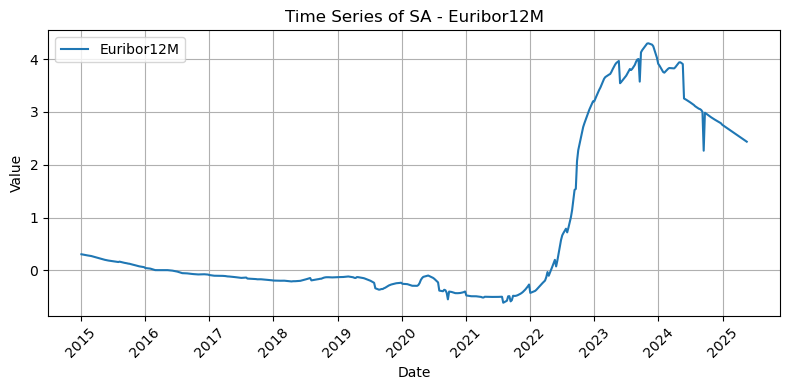

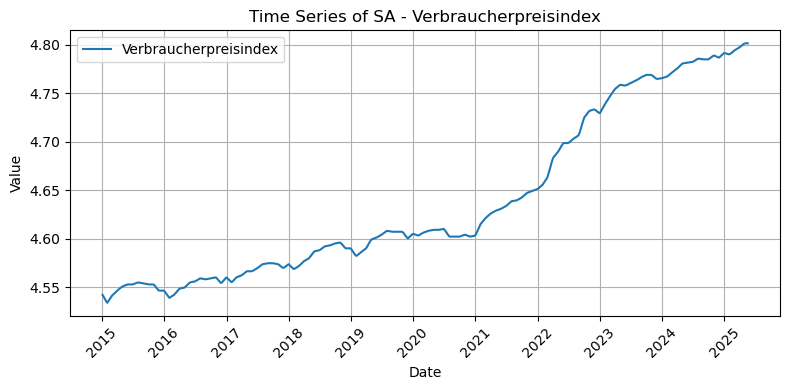

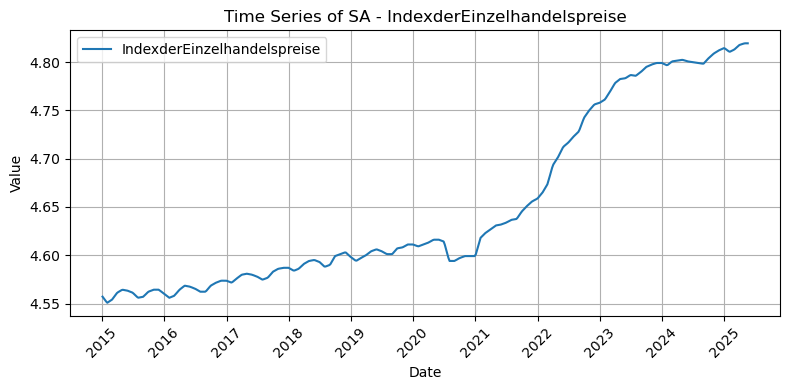

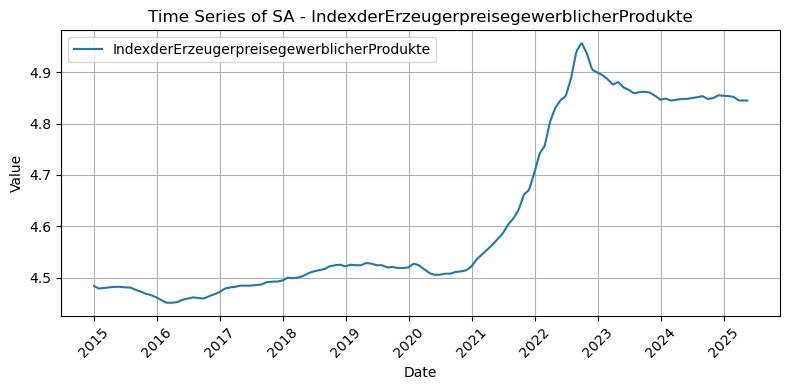

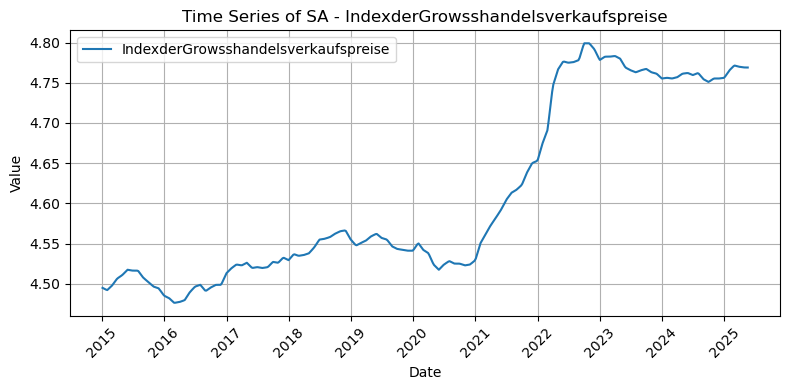

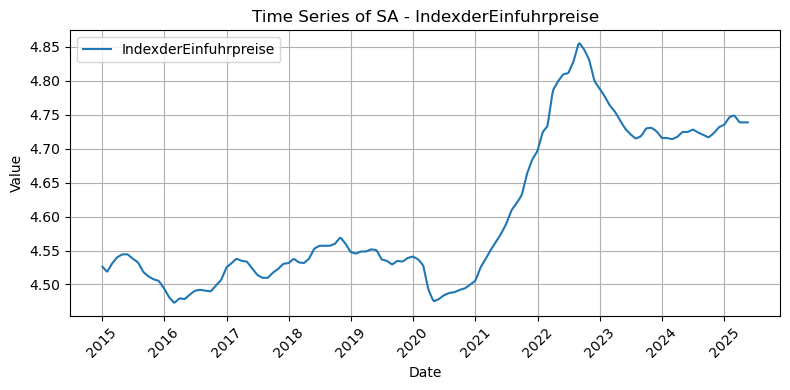

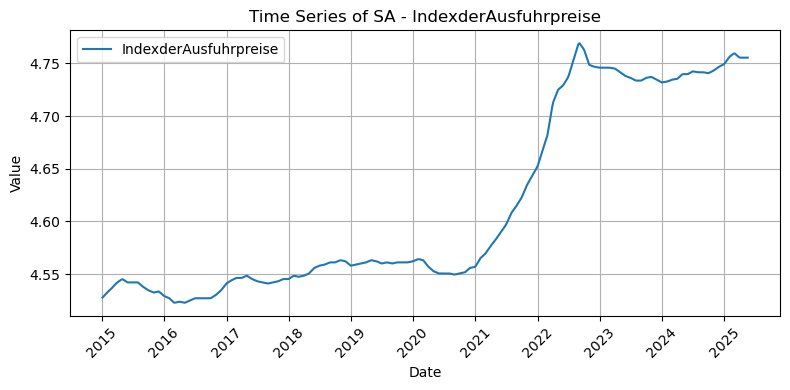

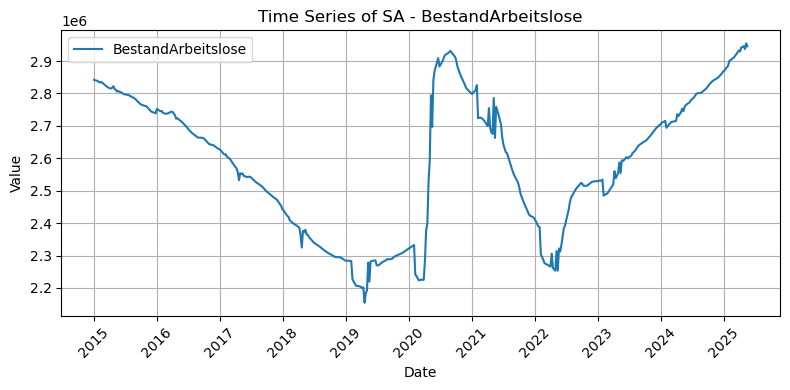

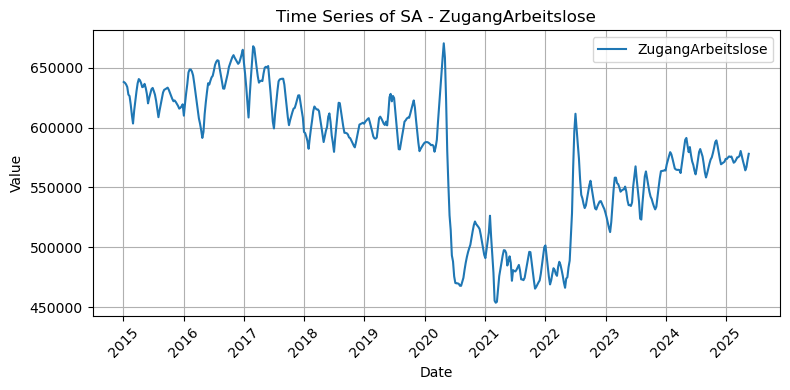

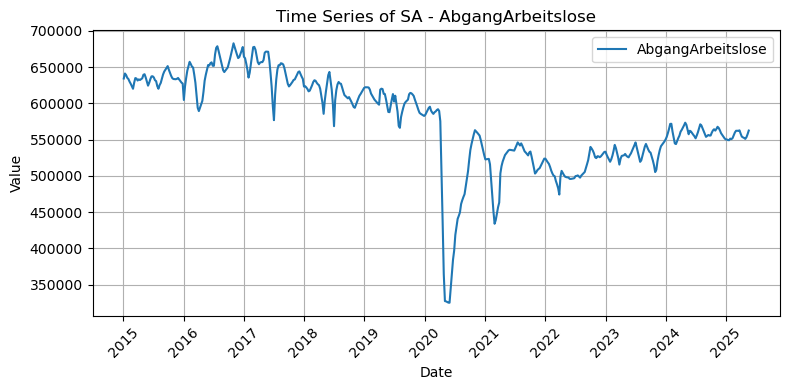

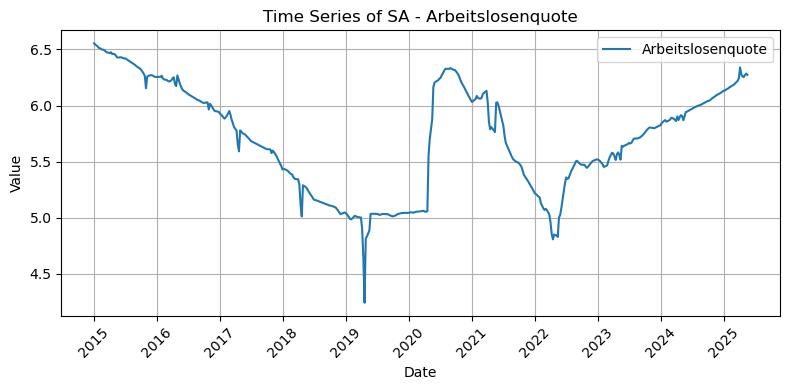

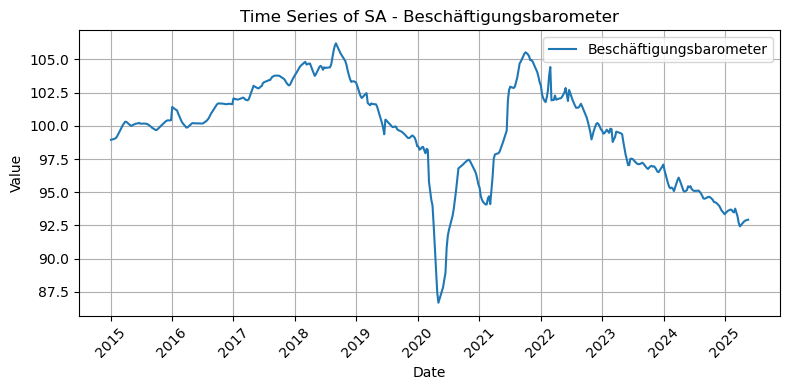

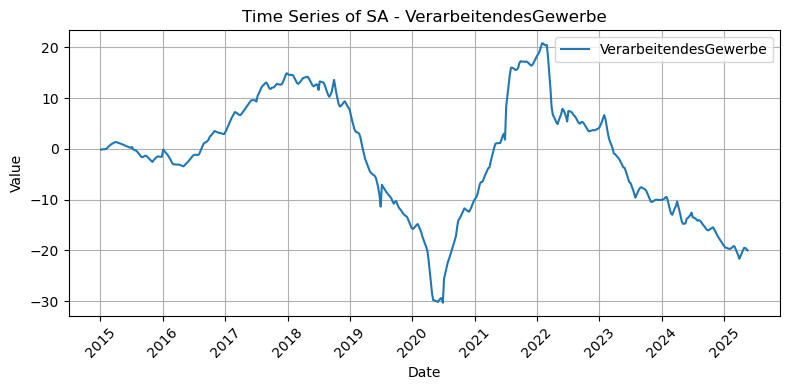

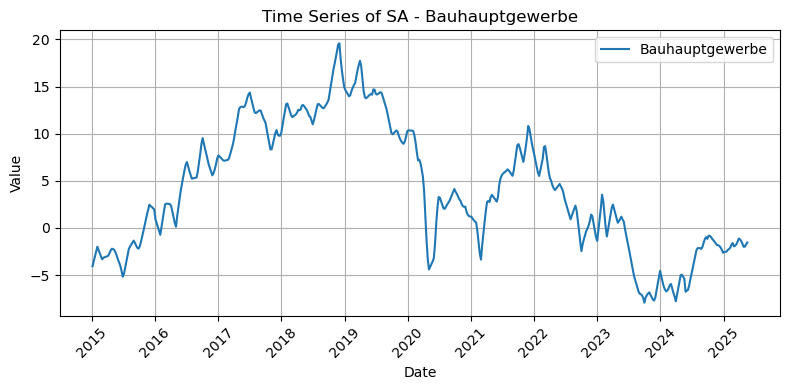

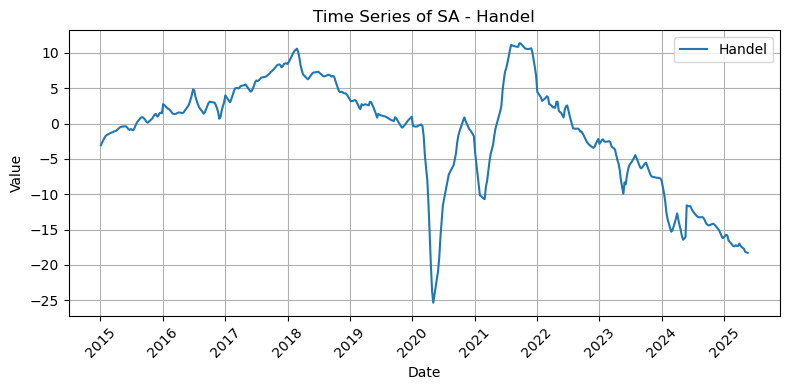

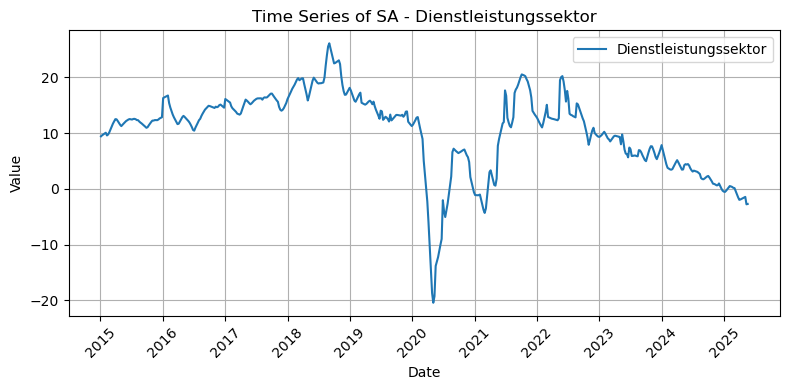

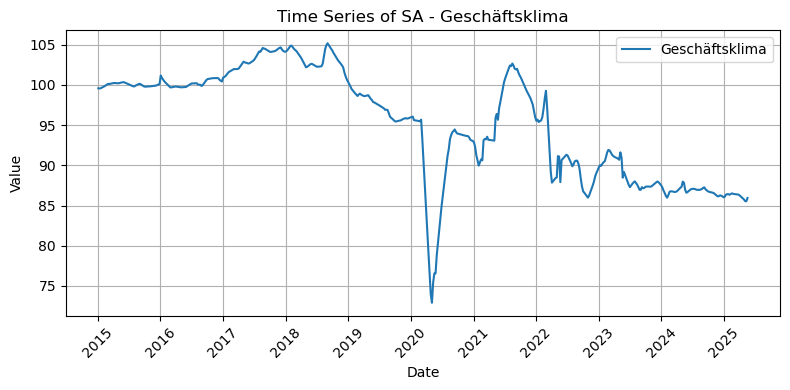

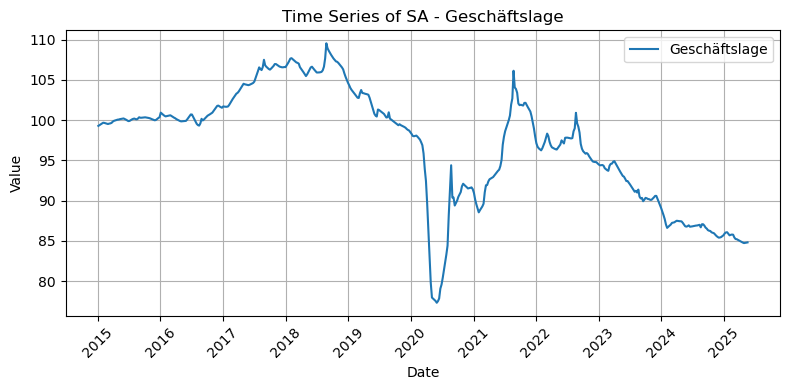

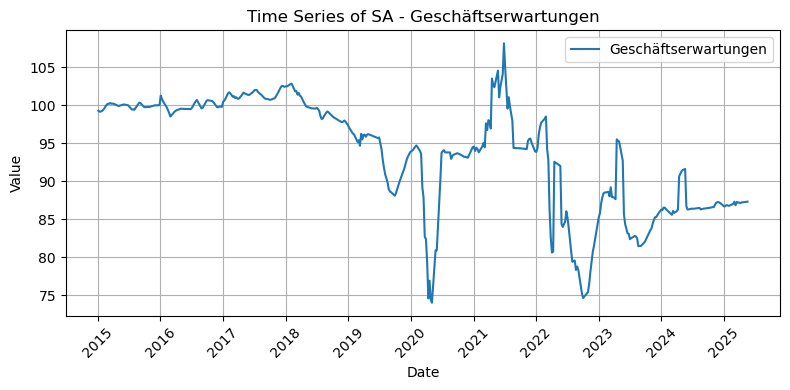

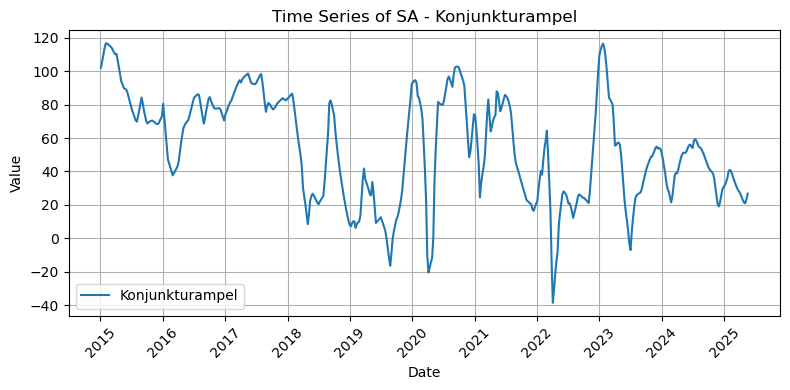

In [16]:
# Plotting Time Series
def plot_time_series(df, title, x_col="DATE", y_cols=None):
    import matplotlib.dates as mdates

    if y_cols is None:
        y_cols = [col for col in df.columns if col != x_col]  # All columns except x_col

    # Ensure x_col is datetime
    df_plot = df.copy()
    if not pd.api.types.is_datetime64_any_dtype(df_plot[x_col]):
        df_plot[x_col] = pd.to_datetime(df_plot[x_col])

    for col in y_cols:
        if col in df_plot.columns:  # Check if column exists
            plt.figure(figsize=(8, 4))
            plt.plot(df_plot[x_col], df_plot[col], label=col)
            plt.title(f"{title} - {col}")
            plt.xlabel("Date")
            plt.ylabel("Value")

            # Set x-axis major ticks to yearly
            ax = plt.gca()
            ax.xaxis.set_major_locator(mdates.YearLocator())
            ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

            plt.legend()
            plt.grid(True)
            plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
            plt.tight_layout()  # Adjust layout to prevent labels from overlapping
            plt.show()
        else:
            print(f"Warning: Column '{col}' not found in DataFrame.")

plot_time_series(
    df_sa, "Time Series of SA"
)

In [17]:
# Testing Stationarity
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

adfsales = adfuller(df_sa["AutoFinanzierung"], autolag="AIC", regression="ct")

In [22]:
# feature engineering
df_fe = df_sa.copy()
df_fe["DATE"] = pd.to_datetime(df_fe["DATE"])

# Create forward-lagged features for SALES at every 4 weeks up to 52 weeks
# A negative shift value moves the data "up" or "forward" in time.
# So, SALES_t+4 at a given row 'i' will be the value of SALES from row 'i+4'.
for lag in range(4, 53, 4):
    df_fe[f"SALES_t+{lag}"] = df_fe["SALES"].shift(-lag)

# Move the lagged SALES columns to be right after the SALES column
lagged_cols = [f"SALES_t+{lag}" for lag in range(4, 53, 4)]
cols = (
    ["DATE", "SALES"]
    + lagged_cols
    + [col for col in df_fe.columns if col not in (["DATE", "SALES"] + lagged_cols)]
)
df_fe = df_fe[cols]

# Drop rows with NaNs created by the forward shift (at the end of the DataFrame)
df_fe.dropna(subset=lagged_cols, inplace=True)
df_fe.reset_index(drop=True, inplace=True)

In [19]:
# P-values

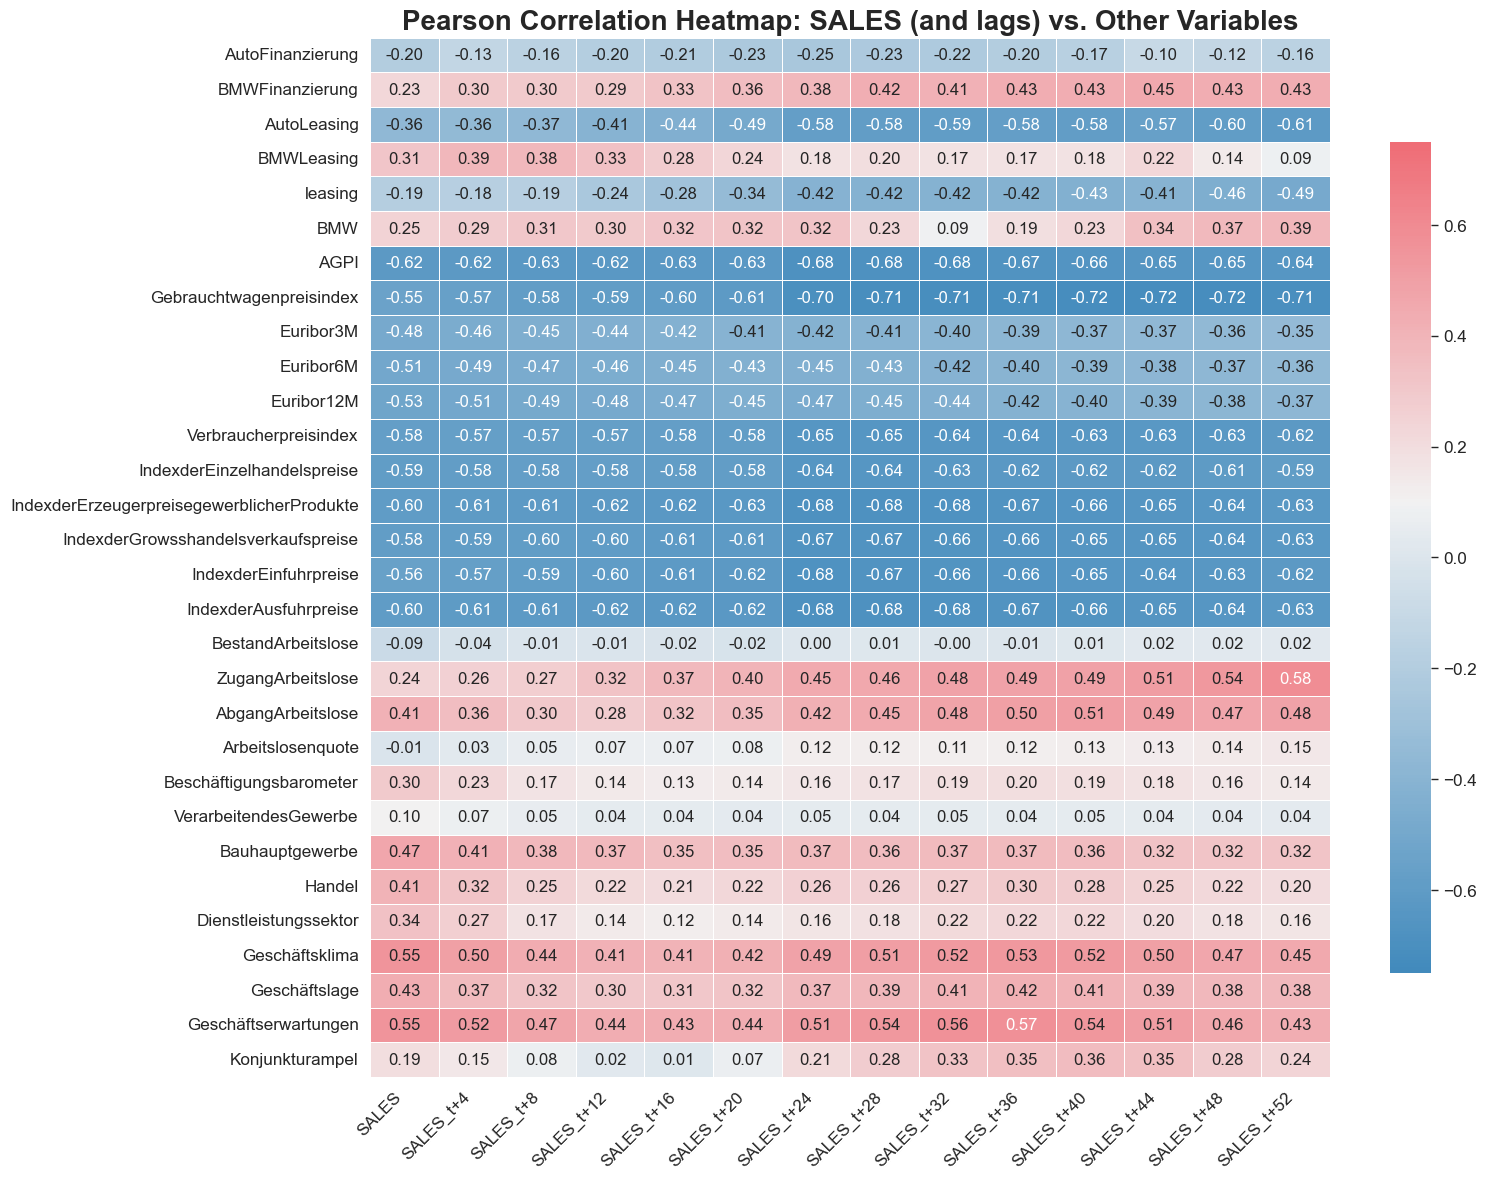


Pearson Correlation Subset:


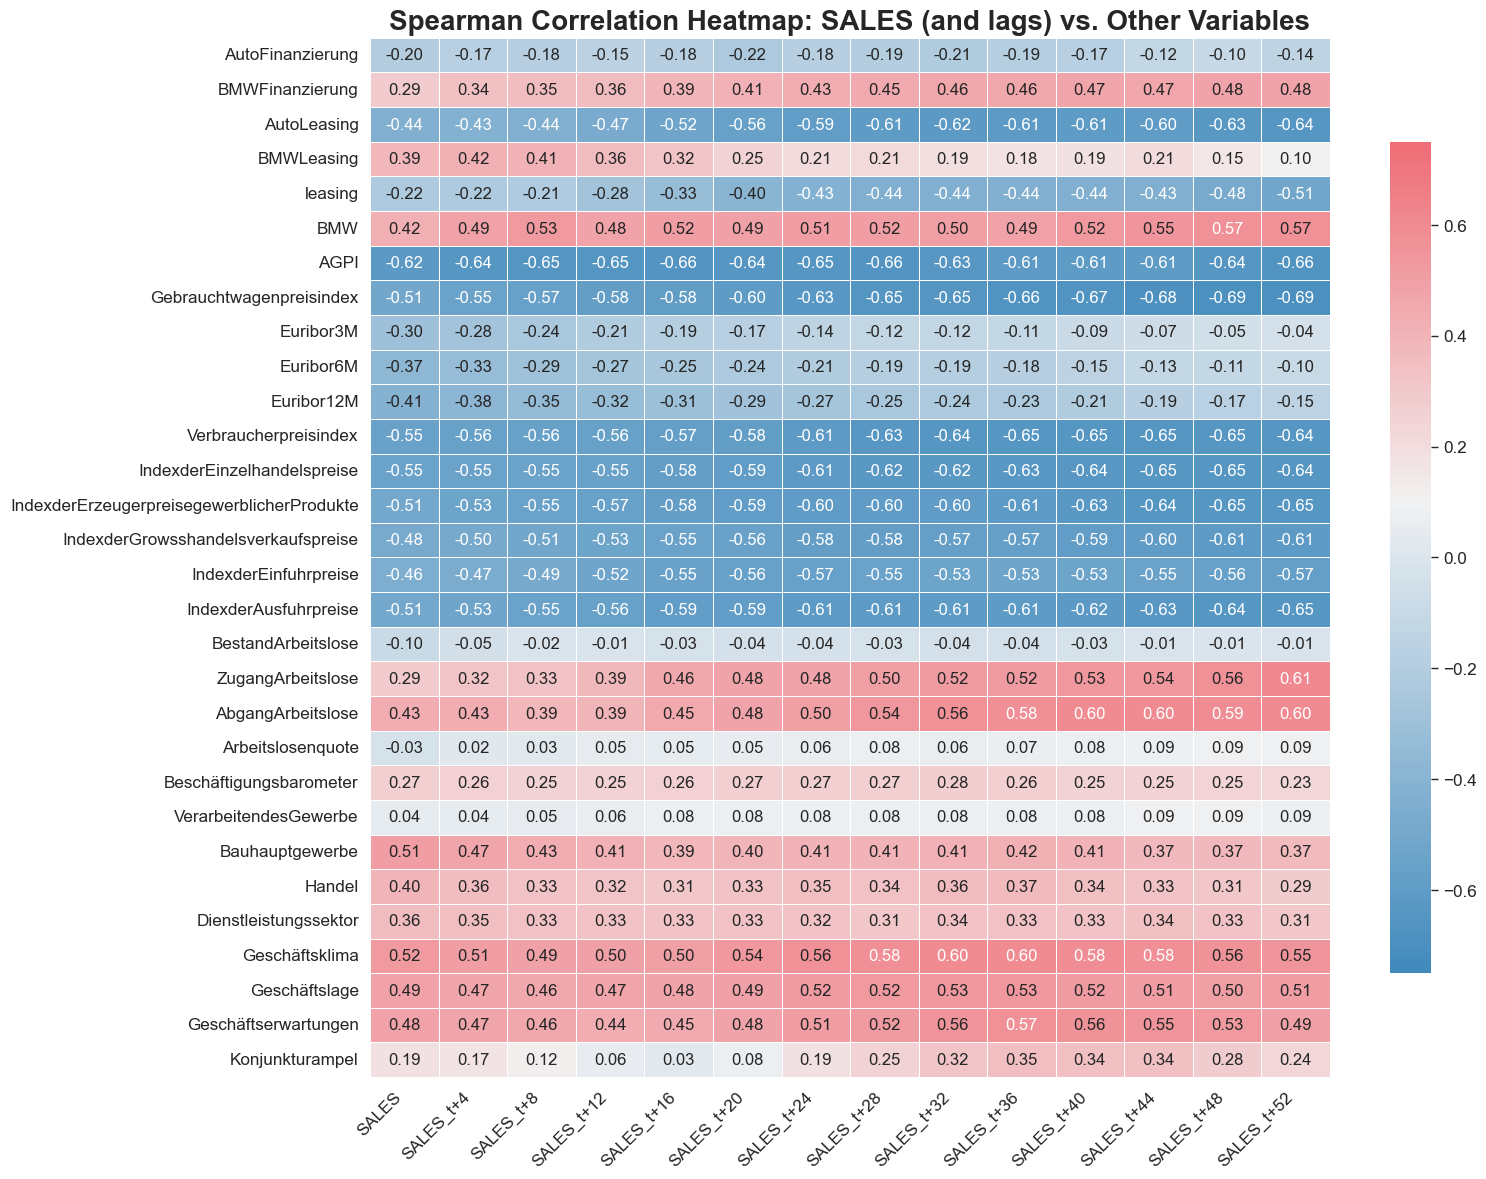


Spearman Correlation Subset:


In [23]:
# Define target columns (SALES and its forward lags)
target_cols = ["SALES"] + [f"SALES_t+{i}" for i in range(4, 53, 4)]

# Define other columns (all columns except DATE and target_cols)
# Ensure other_cols are taken from df_fe after potential modifications like dropping NaNs
other_cols = [col for col in df_fe.columns if col not in target_cols + ["DATE"]]

correlation_methods = ["pearson", "spearman"]
for method in correlation_methods:

    # Calculate the correlation matrix between target_cols and other_cols
    correlation_matrix = df_fe[target_cols + other_cols].corr(method=method)

    # Select the relevant part of the correlation matrix
    # We want to see how 'other_cols' at time t correlate with 'SALES' at t and 'SALES' at t+lag
    correlation_subset = correlation_matrix.loc[other_cols, target_cols]

    # Set the style and context for the plot
    sns.set_style("whitegrid")
    sns.set_context("paper", font_scale=1.4)

    # Define a custom diverging colormap
    custom_palette = sns.diverging_palette(
        240, 10, s=80, l=55, n=256, center="light", as_cmap=True
    )

    # Plot the heatmap
    plt.figure(figsize=(16, 12))
    sns.heatmap(
        correlation_subset,
        annot=True,
        cmap=custom_palette,
        fmt=".2f",
        vmin=-0.75,
        vmax=0.75,
        center=0.1,  # Set the midpoint to ensure values around 0.20 remain close to white
        annot_kws={"size": 12},  # Adjust annotation text size
        linewidths=0.5,  # Add lines between cells
        cbar_kws={"shrink": 0.8},  # Adjust color bar size
    )

    plt.title(
        f"{method.capitalize()} Correlation Heatmap: SALES (and lags) vs. Other Variables",
        fontsize=20,
        fontweight="bold",
    )

    plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
    plt.yticks(rotation=0)  # Keep y-axis labels horizontal
    plt.tight_layout()  # Ensure everything fits in the figure
    plt.show()

    print(f"\n{method.capitalize()} Correlation Subset:")

In [21]:
# Lagged Correlations Cross-Correlation Function - CCF